In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [15]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display basic information
print("Display basic information:")
print(df.info())
print("================================================================")
print("")
print("Numerical details about columns:")
print(df.describe())
print("================================================================")

# Check for missing values
print("Check for missing values:")
print(df.isnull().sum())

# Handle missing values (fill or drop)
df = df.dropna()  # Simple approach - remove rows with missing values

# Convert categorical variables to numerical
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                   'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                   'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                   'Distance_from_Home', 'Gender']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("================================================================")
# Verify data types
print(df.dtypes)

Display basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence       

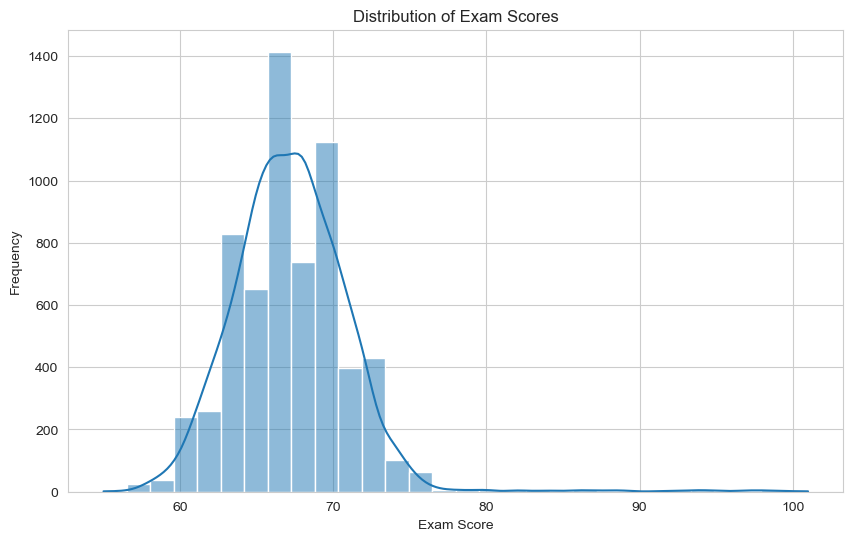

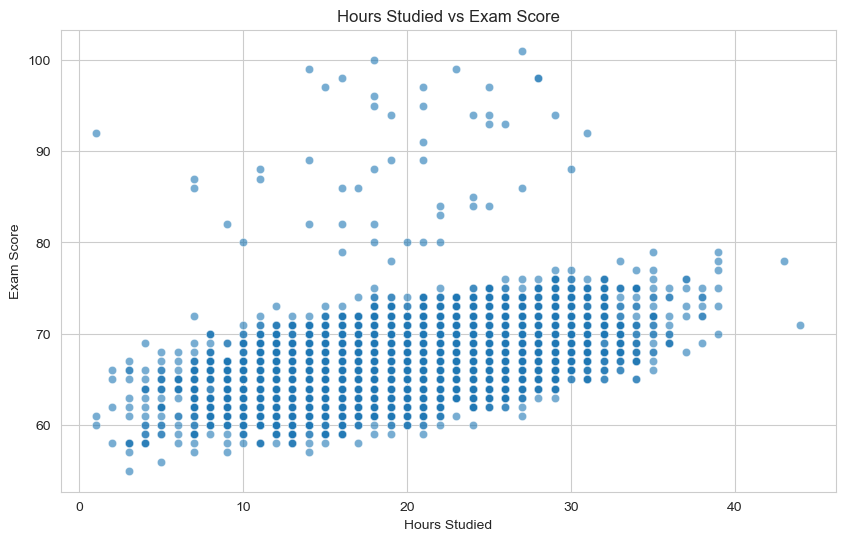

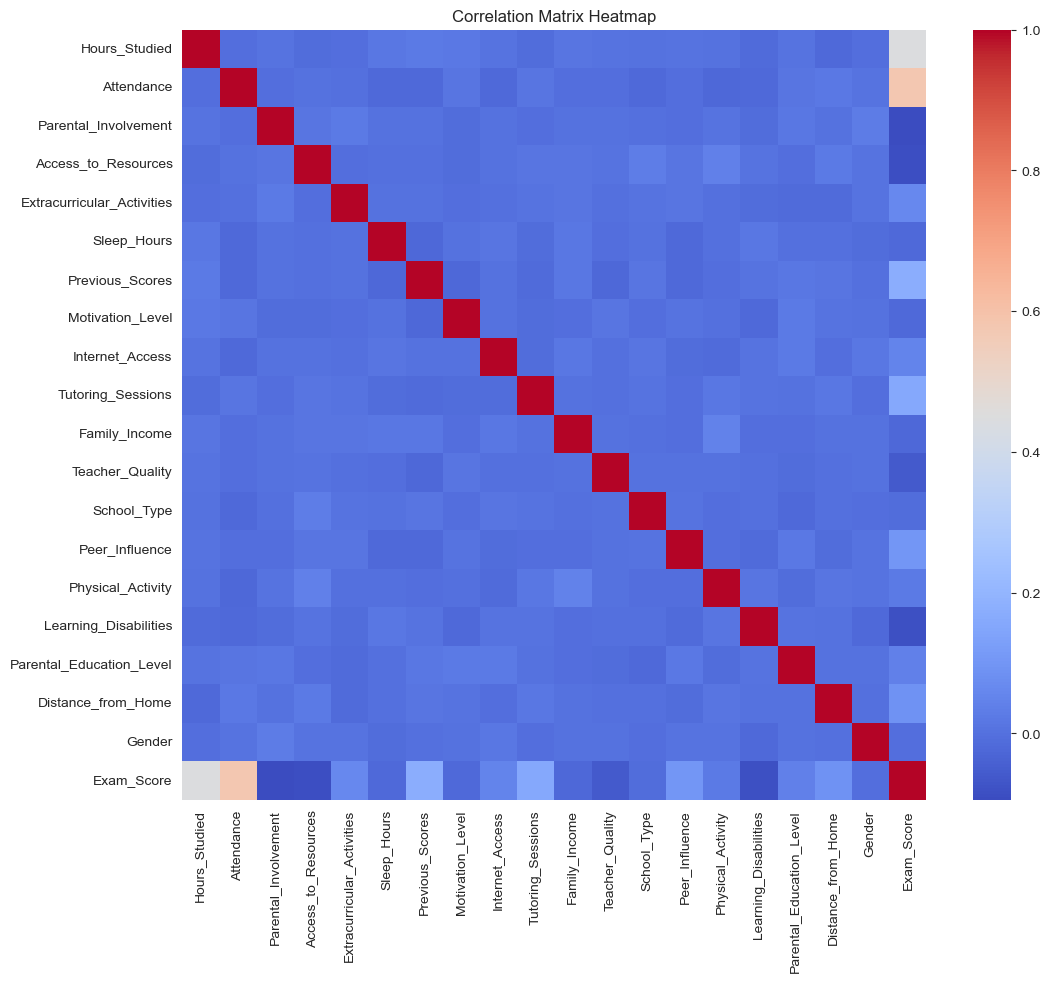

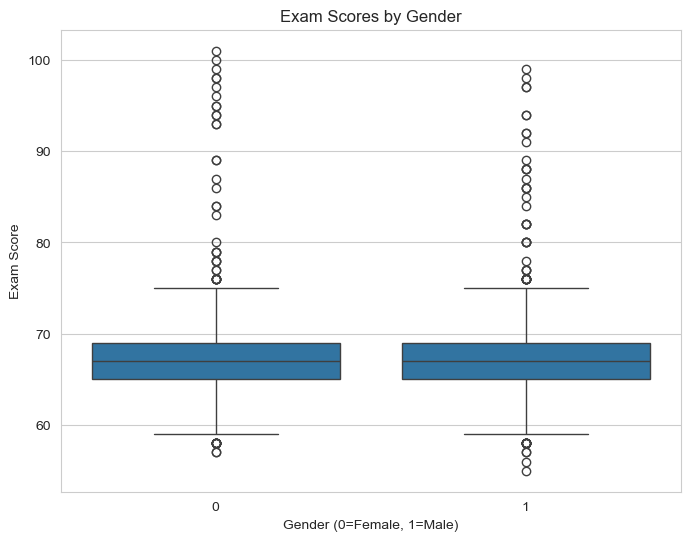

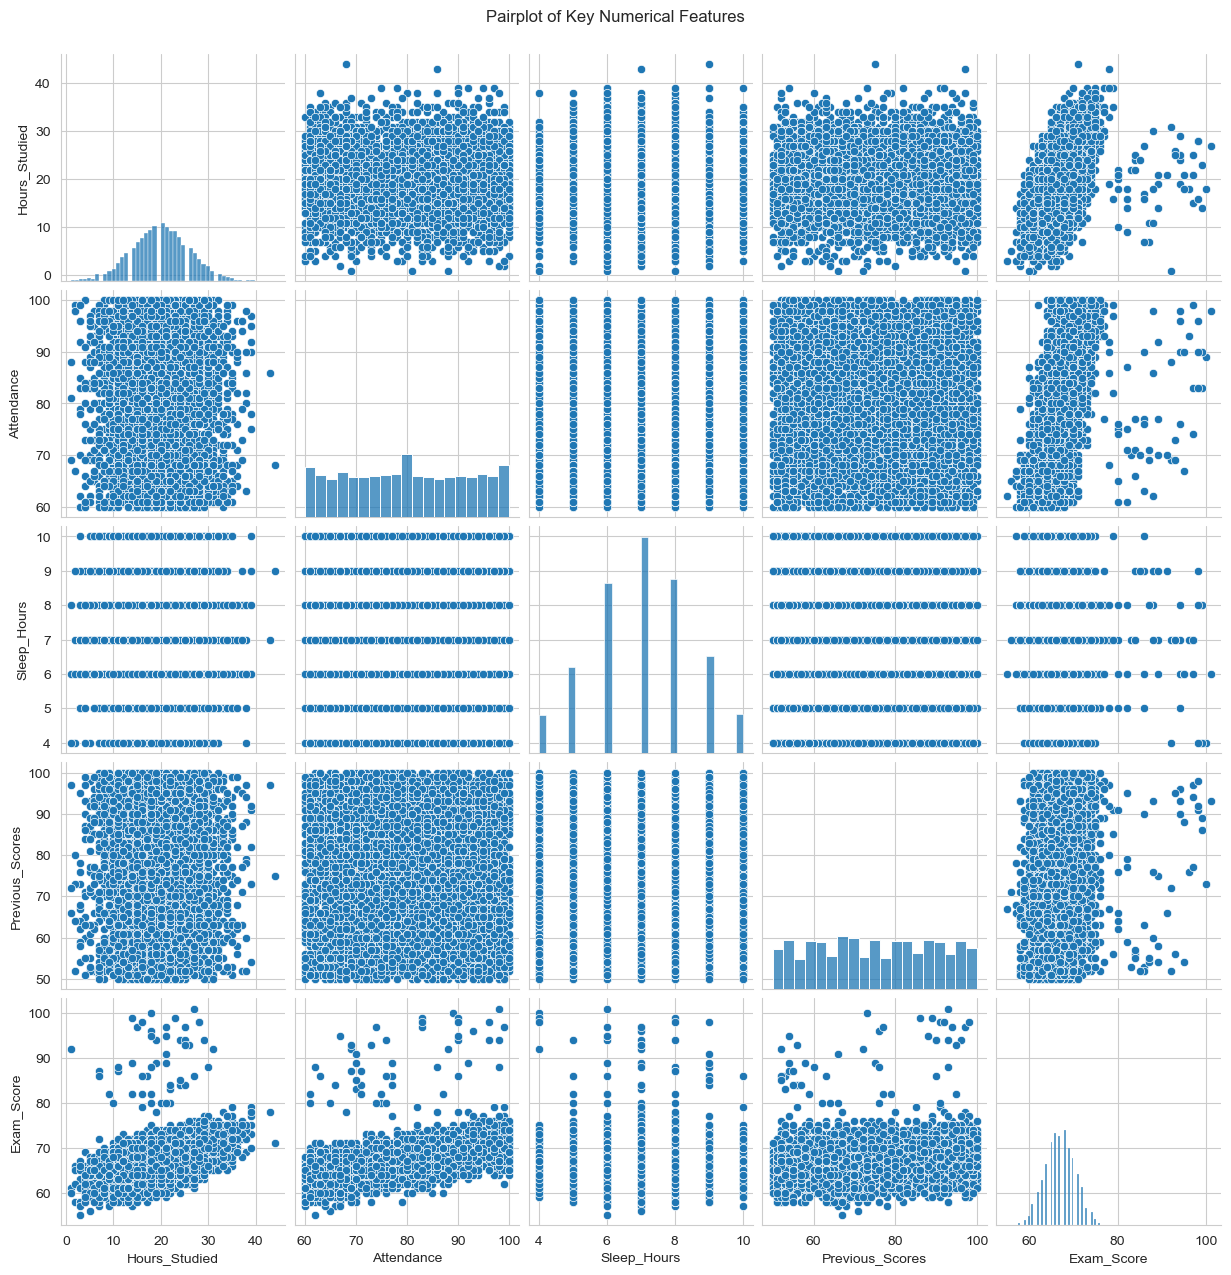

In [9]:
# Set style for visualizations
sns.set_style('whitegrid')

# 1. Distribution of Exam Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=30, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation between Hours Studied and Exam Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, alpha=0.6)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# 3. Correlation matrix heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Boxplot of Exam Scores by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title('Exam Scores by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Exam Score')
plt.show()

# 5. Pairplot of key numerical features
sns.pairplot(df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

In [11]:
# Prepare data for modeling
X = df[['Hours_Studied']]  # Using just hours studied as predictor for simplicity
y = df['Exam_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Hours_Studied: {model.coef_[0]:.2f}")

Model Performance Metrics:
Mean Squared Error: 12.35
Root Mean Squared Error: 3.51
R-squared: 0.21

Model Coefficients:
Intercept: 61.49
Coefficient for Hours_Studied: 0.29


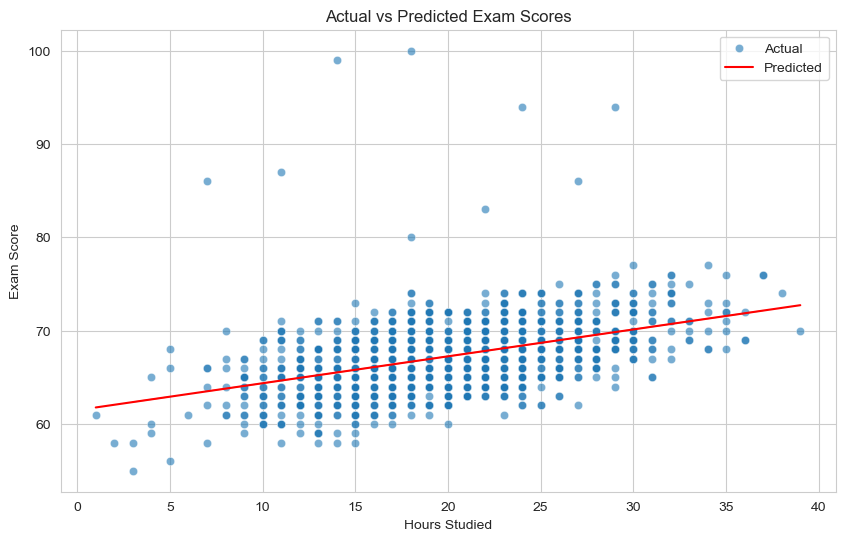

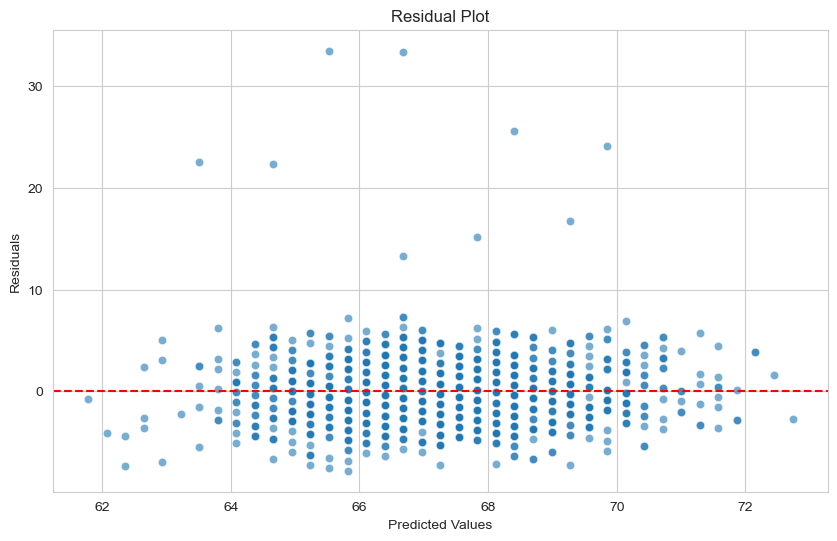

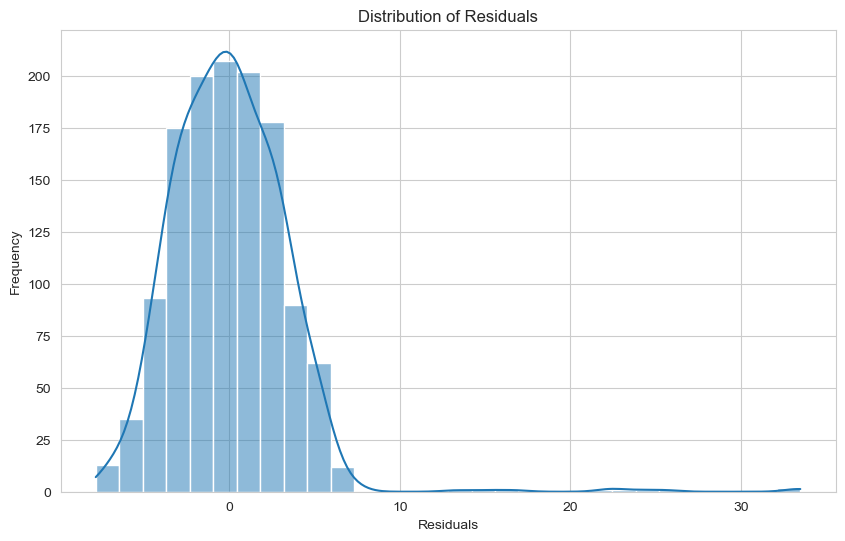

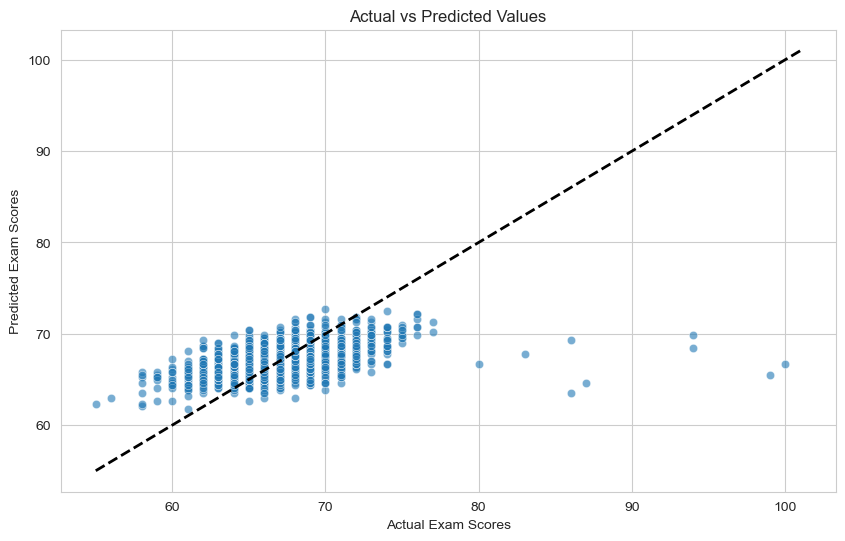

In [13]:
# 1. Regression line visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, alpha=0.6, label='Actual')
sns.lineplot(x=X_test['Hours_Studied'], y=y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 4. Actual vs Predicted values comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.show()

In [19]:
# Create polynomial features and linear regression pipeline
degrees = [1, 2, 3, 4]  # We'll test different polynomial degrees
results = {}

for degree in degrees:
    # Create pipeline
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    
    # Fit the model
    poly_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_poly = poly_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    
    # Store results
    results[degree] = {
        'model': poly_model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred_poly
    }
    
    print(f"\nDegree {degree} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")


Degree 1 Performance:
Mean Squared Error: 12.35
Root Mean Squared Error: 3.51
R-squared: 0.21

Degree 2 Performance:
Mean Squared Error: 12.35
Root Mean Squared Error: 3.51
R-squared: 0.21

Degree 3 Performance:
Mean Squared Error: 12.37
Root Mean Squared Error: 3.52
R-squared: 0.20

Degree 4 Performance:
Mean Squared Error: 12.40
Root Mean Squared Error: 3.52
R-squared: 0.20


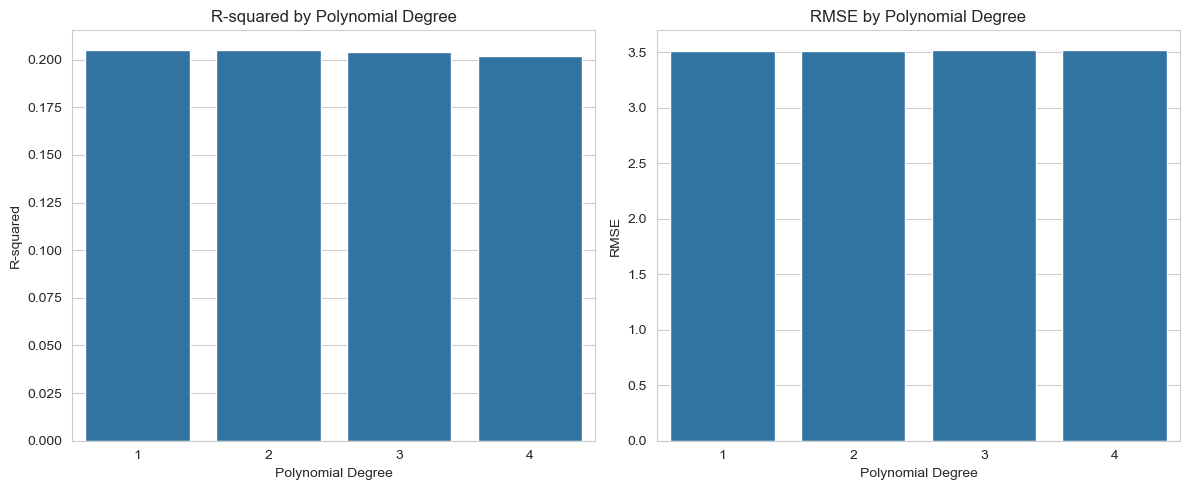

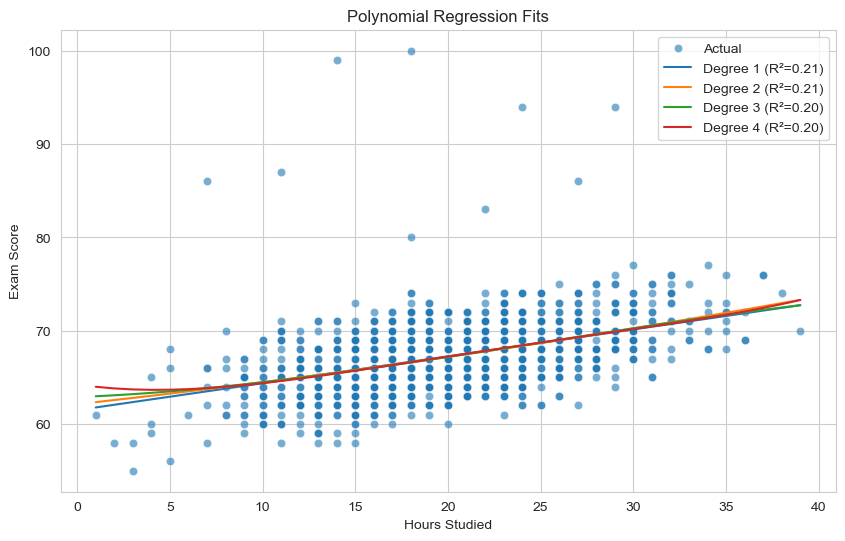

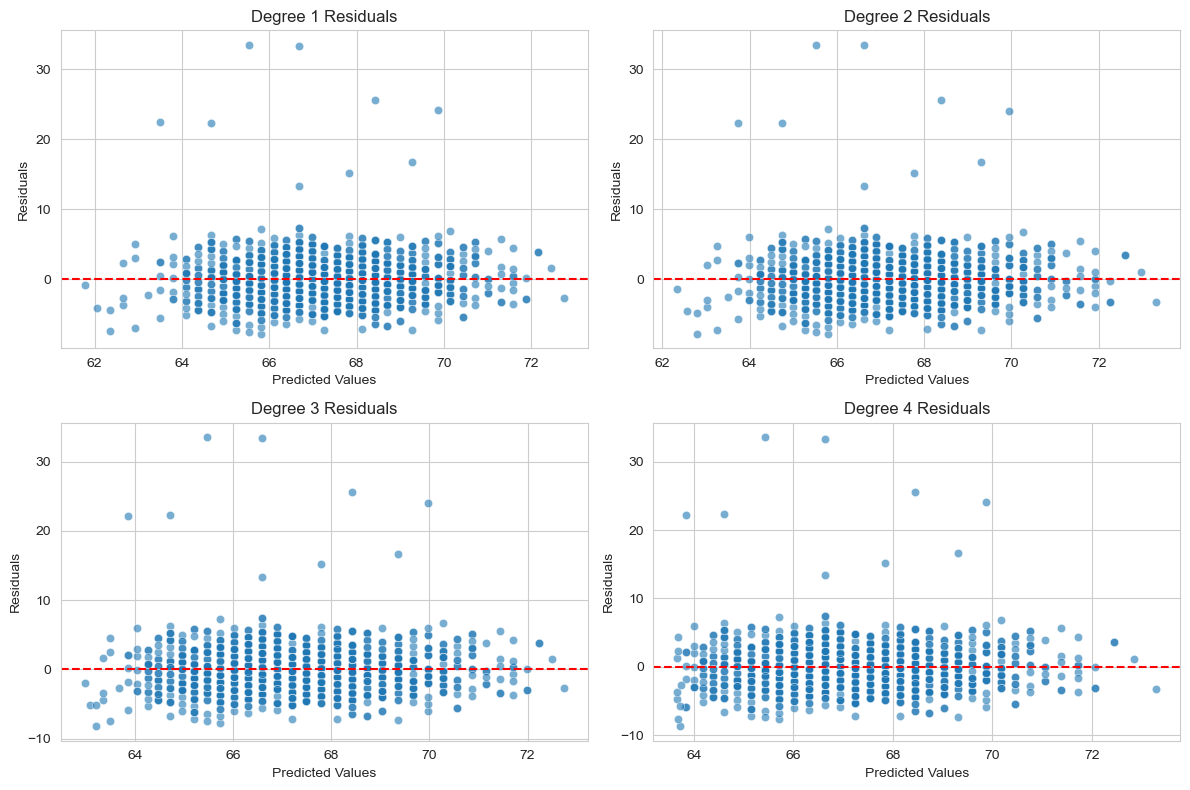

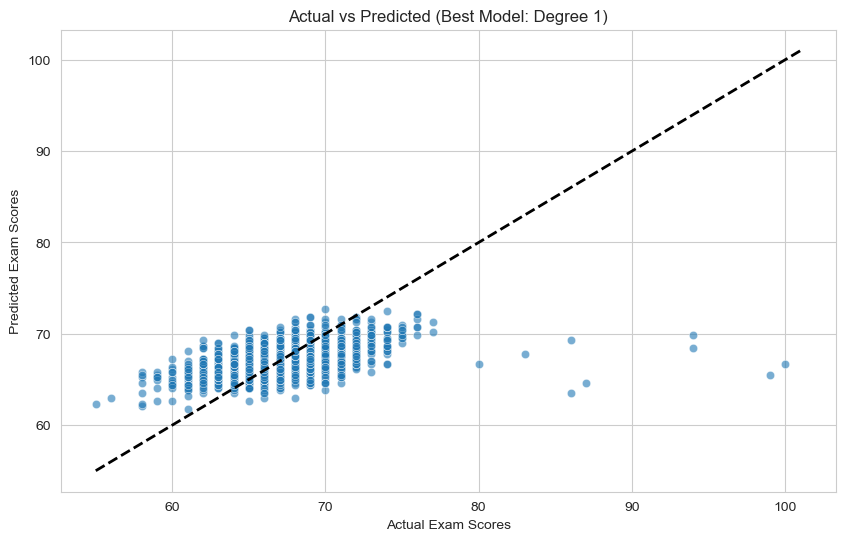

In [21]:
# 1. Compare model performance across degrees
degrees_list = list(results.keys())
r2_scores = [results[d]['r2'] for d in degrees_list]
rmse_scores = [results[d]['rmse'] for d in degrees_list]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=degrees_list, y=r2_scores)
plt.title('R-squared by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared')

plt.subplot(1, 2, 2)
sns.barplot(x=degrees_list, y=rmse_scores)
plt.title('RMSE by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# 2. Visualize polynomial regression curves
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, alpha=0.6, label='Actual')

# Sort values for smooth curves
sorted_idx = np.argsort(X_test.values.flatten())
X_sorted = X_test.values[sorted_idx]

# Plot each polynomial regression
for degree in degrees:
    y_pred_sorted = results[degree]['predictions'][sorted_idx]
    plt.plot(X_sorted, y_pred_sorted, 
             label=f'Degree {degree} (R²={results[degree]["r2"]:.2f})')

plt.title('Polynomial Regression Fits')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# 3. Residual plots comparison
plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 2, i)
    residuals = y_test - results[degree]['predictions']
    sns.scatterplot(x=results[degree]['predictions'], y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Degree {degree} Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# 4. Actual vs Predicted comparison for best model
best_degree = max(results.keys(), key=lambda x: results[x]['r2'])
best_pred = results[best_degree]['predictions']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title(f'Actual vs Predicted (Best Model: Degree {best_degree})')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.show()

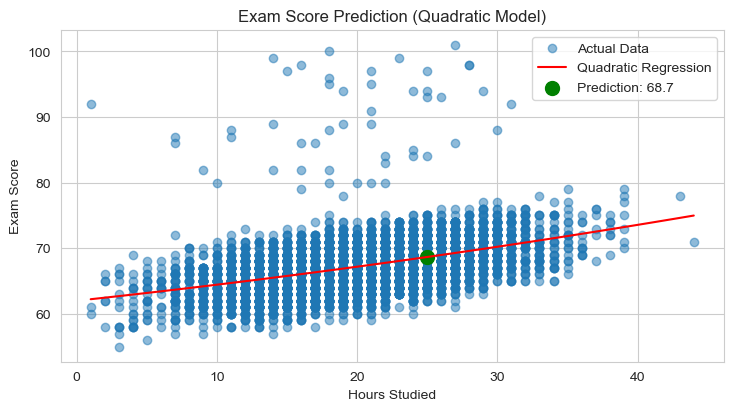

In [25]:
class ExamScorePredictor:
    def __init__(self, root):
        self.root = root
        self.root.title("Student Exam Score Predictor")
        self.root.geometry("900x700")
        
        # Load and prepare data
        self.df = pd.read_csv('StudentPerformanceFactors.csv')
        self.X = self.df[['Hours_Studied']].values
        self.y = self.df['Exam_Score'].values
        
        # Train quadratic polynomial model
        self.model = make_pipeline(
            PolynomialFeatures(degree=2),
            LinearRegression()
        )
        self.model.fit(self.X, self.y)
        
        # Create GUI components
        self.create_widgets()
        
        # Plot initial visualization
        self.update_plot()
    
    def create_widgets(self):
        # Main frame
        main_frame = ttk.Frame(self.root, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)
        
        # Input frame
        input_frame = ttk.LabelFrame(main_frame, text="Prediction", padding="10")
        input_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(input_frame, text="Hours Studied:").grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
        self.hours_entry = ttk.Entry(input_frame)
        self.hours_entry.grid(row=0, column=1, padx=5, pady=5)
        
        ttk.Button(input_frame, text="Predict Score", command=self.predict_score).grid(row=0, column=2, padx=5, pady=5)
        
        self.prediction_label = ttk.Label(input_frame, text="Predicted Score: ")
        self.prediction_label.grid(row=1, column=0, columnspan=3, pady=5)
        
        # Model info frame
        info_frame = ttk.LabelFrame(main_frame, text="Model Information", padding="10")
        info_frame.pack(fill=tk.X, pady=5)
        
        # Get model coefficients
        coefficients = self.model.named_steps['linearregression'].coef_
        intercept = self.model.named_steps['linearregression'].intercept_
        
        ttk.Label(info_frame, text=f"Model Equation: Score = {intercept:.2f} + {coefficients[1]:.2f}*Hours + {coefficients[2]:.2f}*Hours²").pack(anchor=tk.W)
        
        # Calculate R-squared
        r2 = self.model.score(self.X, self.y)
        ttk.Label(info_frame, text=f"Model Accuracy (R²): {r2:.3f}").pack(anchor=tk.W)
        
        # Visualization frame
        viz_frame = ttk.LabelFrame(main_frame, text="Visualization", padding="10")
        viz_frame.pack(fill=tk.BOTH, expand=True, pady=5)
        
        # Create matplotlib figure
        self.fig, self.ax = plt.subplots(figsize=(8, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=viz_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
    def predict_score(self):
        try:
            hours = float(self.hours_entry.get())
            if hours < 0:
                messagebox.showerror("Error", "Hours studied cannot be negative")
                return
                
            # Predict using quadratic model
            prediction = self.model.predict([[hours]])[0]
            self.prediction_label.config(text=f"Predicted Score: {prediction:.1f}")
            
            # Update plot with new prediction point
            self.update_plot(hours, prediction)
            
        except ValueError:
            messagebox.showerror("Error", "Please enter a valid number of hours")
    
    def update_plot(self, pred_hours=None, pred_score=None):
        self.ax.clear()
        
        # Plot actual data points
        self.ax.scatter(self.X, self.y, alpha=0.5, label='Actual Data')
        
        # Plot regression curve
        x_range = np.linspace(min(self.X), max(self.X), 100).reshape(-1, 1)
        y_pred = self.model.predict(x_range)
        self.ax.plot(x_range, y_pred, color='red', label='Quadratic Regression')
        
        # Plot prediction point if provided
        if pred_hours is not None and pred_score is not None:
            self.ax.scatter([pred_hours], [pred_score], color='green', s=100, 
                           label=f'Prediction: {pred_score:.1f}')
        
        self.ax.set_xlabel('Hours Studied')
        self.ax.set_ylabel('Exam Score')
        self.ax.set_title('Exam Score Prediction (Quadratic Model)')
        self.ax.legend()
        self.ax.grid(True)
        
        self.canvas.draw()
    
    def run(self):
        self.root.mainloop()

if __name__ == "__main__":
    root = tk.Tk()
    app = ExamScorePredictor(root)
    app.run()